In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output

## Common Tangent Algorithm
The logic used to find the common tangent of two curves is shown in the method below. The program calculates instantaneous slopes and y-intercepts for each set of points initially provided, and then loops over both arrays of slopes and y-intercepts to find the minimum value for each curve. The program can only be used to find a single common tangent for now, but can be modified in the future to find multiple points of tangency.

In [2]:
def find_common_tangent(x1, y1, x2, y2):    
    marr1 = np.array([]) #initialize slope and y intercept arrays
    marr2 = np.array([])
    barr1 = np.array([])
    barr2 = np.array([])
    
    for i in range(len(x1)-1): #calculate slope and y intercept for curve 1
        mval = (y1[i] - y1[i+1])/(x1[i]-x1[i+1])
        bval = y1[i] - mval*x1[i]
        marr1 = np.append(marr1, mval)
        barr1 = np.append(barr1, bval)
    
    for i in range(len(x2)-1): #calculate slope and y intercept for curve 2
        mval = (y2[i] - y2[i+1])/(x2[i]-x2[i+1])
        bval = y2[i] - mval*x2[i]
        marr2 = np.append(marr2, mval)
        barr2 = np.append(barr2, bval)
    
    dm = abs(marr1[0] - marr2[0])
    db = abs(barr1[0] - barr2[0])
    for i in range(len(marr1)): #simultaneously minimize difference
        for j in range(len(marr2)):
            if dm > abs(marr1[i]-marr2[j]) and db > abs(barr1[i]-barr2[j]):
                dm = abs(marr1[i]-marr2[j])
                db = abs(barr1[i]-barr2[j])
                m1 = marr1[i]
                m2 = marr2[j]
                b1 = barr1[i]
                b2 = barr2[j]
                
                u1 = x1[i]
                u2 = x2[j]
                v1 = y1[i]
                v2 = y2[j]
                
    mfinal = (v1-v2)/(u1-u2)
    bfinal = v2 - mfinal*u2
    print "Coordinates of points of tangency are: (%1.4f, %1.4f) "\
    "and (%1.4f, %1.4f)" % (u1, v1, u2, v2)
    print "A0 = ", bfinal, ", A1 = ", mfinal
    return mfinal, bfinal

The next few cells get the x- and y-values for the S, U curves from Homework 5.

In [2]:
hw5x1 = pd.read_clipboard(header=None)

In [3]:
hw5y1 = pd.read_clipboard(header=None)

In [5]:
hw5y2 = pd.read_clipboard(header=None)

In [4]:
hw5x2 = pd.read_clipboard(header=None)

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.font_manager

f_size = 14
mpl.rcParams['xtick.labelsize']=f_size
mpl.rcParams['ytick.labelsize']=f_size
mpl.rcParams['axes.labelweight']='light'
mpl.rcParams['axes.labelsize']=f_size
mpl.rcParams['font.size']=f_size
mpl.rcParams['font.family']='sans-serif'
mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['font.style']='normal'
mpl.rcParams['font.weight']='light'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'
mpl.rcParams["figure.figsize"] = (8,5)

### Question 2 Part 1: Programmatically Determining the Common Tangent for HW 1 Curves

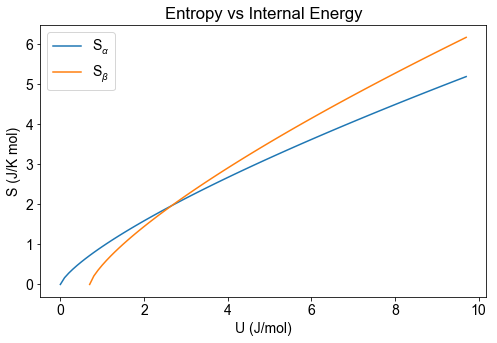

In [35]:
fig, ax = plt.subplots() #plot the standalone curves
p = plt.plot(hw5x1, hw5y1, label=r'S$_{\alpha}$')
p2 = plt.plot(hw5x2, hw5y2, label=r'S$_{\beta}$') 
plt.title("Entropy vs Internal Energy")
plt.xlabel(r"U (J/mol)")
plt.ylabel("S (J/K mol)")

legend = ax.legend(loc='upper left')
plt.show()

In [10]:
hw5x1 = hw5x1.values
hw5y1 = hw5y1.values
hw5x2 = hw5x2.values
hw5y2 = hw5y2.values

The command below finds the common tangent for the data points pulled from the Excel spreadsheet.

In [20]:
m1, b1 = find_common_tangent(hw5x1, hw5y1, hw5x2, hw5y2)

Coordinates of points of tangency are: (1.4000, 1.2134) and (4.3000, 3.0984)
A0 =  [ 0.30347178] , A1 =  [ 0.64998021]


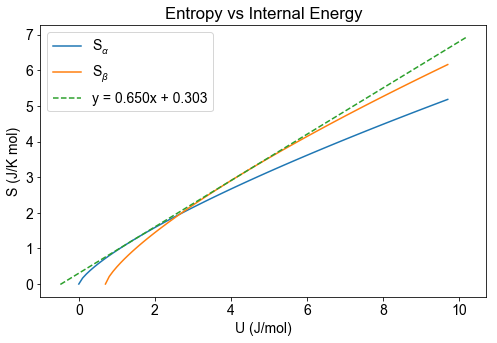

In [37]:
fig, ax = plt.subplots()
p1 = plt.plot(hw5x1, hw5y1, label=r'S$_{\alpha}$')
p2 = plt.plot(hw5x2, hw5y2, label=r'S$_{\beta}$')
x_line = np.array(ax.get_xlim())
y_line1 = b1 + m1*x_line
labelstring = 'y = %1.3fx + %1.3f' % (m1, b1)
p3 = plt.plot(x_line, y_line1, '--', label=labelstring)

plt.title("Entropy vs Internal Energy")
plt.xlabel(r"U (J/mol)")
plt.ylabel("S (J/K mol)")

legend = ax.legend(loc='upper left')
plt.show()

### Question 2 Part 4a: Calculating the Common Tangent using F vs. e equation

Coordinates of points of tangency are: (0.0059, -12912.9250) and (0.0157, -10950.2156)
A0 =  -14081.2044902 , A1 =  199608.889351


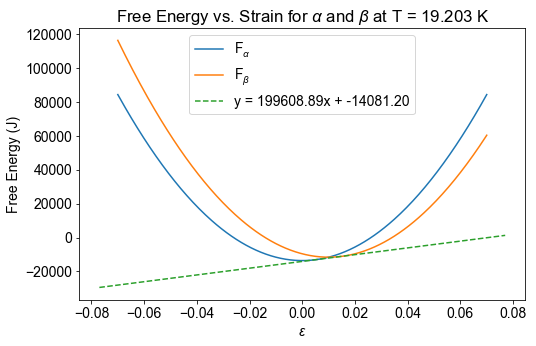

In [47]:
ua0 = 0 #set values for constants
ub0 = 13333.0
a = 1.2
b = 2.2
E = 4.0e7
de = 0.01
t = 19.203

e_line = np.linspace(-.07, .07, num=300)
fa = ua0 - (a*(t**4))/12 + 0.5*E*(np.square(e_line))
fb = ub0 - (b*(t**4))/12 + 0.5*E*(np.square(e_line-de))

me, be = find_common_tangent(e_line, fa, e_line, fb)

fig, ax = plt.subplots()
p1 = plt.plot(e_line, fa, label = r'F$_{\alpha}$')
p2 = plt.plot(e_line, fb, label = r'F$_{\beta}$')

x_line = np.array(ax.get_xlim())
y_line = be + me*x_line
labelstring = 'y = %1.2fx + %1.2f' % (me, be)
p3 = plt.plot(x_line, y_line, '--', label=labelstring)

plt.title(r'Free Energy vs. Strain for $\alpha$ and $\beta$ at T = %1.3f K' %t)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'Free Energy (J)')
legend = ax.legend(loc='upper center')

In [48]:
t1_star = (12*((ua0-ub0)+0.5*E*(de**2))/(a-b))**(0.25)
print 'T1 equals %1.4f K' %t1_star
t2_star = (12*((ub0-ua0)+0.5*E*(de**2))/(b-a))**(0.25)
print 'T2 equals %1.4f K' %t2_star

T1 equals 19.2036 K
T2 equals 20.7110 K


In [28]:
e_line = np.linspace(-.07, .07, num=4000)

trange = np.linspace(19, 21, num=200)

e_1 = np.array([])
e_2 = np.array([])
for temp in trange:
    clear_output(wait=True)
    fa = ua0 - (a*(temp**4))/12 + 0.5*E*(np.square(e_line))
    fb = ub0 - (b*(temp**4))/12 + 0.5*E*(np.square(e_line-de))
    u1, u2 = find_common_tangent(e_line, fa, e_line, fb)
    e_1 = np.append(e_1, u1)
    e_2 = np.append(e_2, u2)
    print temp

Coordinates of points of tangency are: (-0.0448, 20744.1597) and (-0.0443, 36731.7856)
A0 =  1483040.9415 , A1 =  32619650.9748
21.0


### Question 2 Part 4b: Mapping the Phase Change Boundary
I calculated the phase diagram by finding the common tangent many many times for the $\alpha$ and $\beta$ sets of free energy vs. strain curves, over the temperature range 19 to 21 K. I then plotted the strain values of the points of tangency for each curve vs temperature to generate the boundary graph. The boundaries are quite jagged! They could probably be made smoother if the strain arrays had more points. But increasing the number of points in the strain array (decreasing the step size) made calculations prohibitively slow. The best graphs I was able to get are shown below. Hopefully when taken all together, they provide a relatively good picture of the phase boundaries.

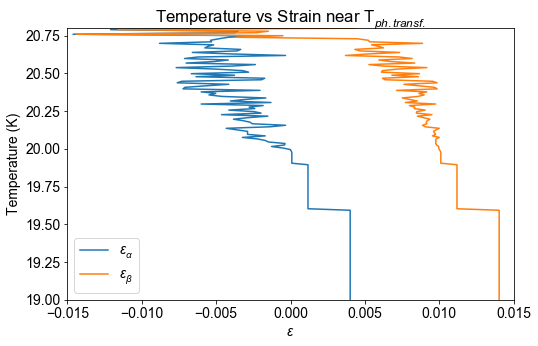

In [33]:
fig, ax = plt.subplots()
p1 = plt.plot(e_1, trange, label=r'$\epsilon_{\alpha}$')
p2 = plt.plot(e_2, trange, label=r'$\epsilon_{\beta}$')

legend = ax.legend(loc="lower left")
title = plt.title(r'Temperature vs Strain near T$_{ph. transf.}$')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'Temperature (K)')
ax.set_xlim(-0.015, 0.015)
ax.set_ylim(19, 20.8)
plt.show()

Strain array for each curve was calculated from -0.7 to 0.7, with 4000 points. Temperatures were set from 19 to 21 K, with 200 points. Shown below are several other attempts to get a nice-looking phase diagram.

In [61]:
e_line = np.linspace(-.07, .07, num=1000)
trange = np.linspace(19, 21, num=400)
e_1 = np.array([])
e_2 = np.array([])
for temp in trange:
    clear_output(wait=True)
    fa = ua0 - (a*(temp**4))/12 + 0.5*E*(np.square(e_line))
    fb = ub0 - (b*(temp**4))/12 + 0.5*E*(np.square(e_line-de))
    u1, u2 = find_common_tangent(e_line, fa, e_line, fb)
    e_1 = np.append(e_1, u1)
    e_2 = np.append(e_2, u2)
    print temp

Coordinates of points of tangency are: (-0.0201, -11359.7694) and (-0.0190, -5514.6203)
A0 =  93487.592182 , A1 =  5213664.22338
21.0


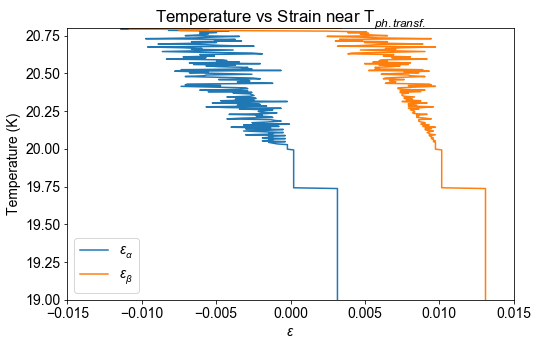

In [62]:
fig, ax = plt.subplots()
p1 = plt.plot(e_1, trange, label=r'$\epsilon_{\alpha}$')
p2 = plt.plot(e_2, trange, label=r'$\epsilon_{\beta}$')

legend = ax.legend(loc="lower left")
title = plt.title(r'Temperature vs Strain near T$_{ph. transf.}$')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'Temperature (K)')
ax.set_xlim(-0.015, 0.015)
ax.set_ylim(19, 20.8)
plt.show()

Strain array was set from -0.7 to 0.7, with 1000 points. T = 19 to 21 K, with 400 points.

In [63]:
e_line = np.linspace(-.07, .07, num=1000)

trange = np.linspace(19, 21, num=1000)

e_1 = np.array([])
e_2 = np.array([])
for temp in trange:
    clear_output(wait=True)
    fa = ua0 - (a*(temp**4))/12 + 0.5*E*(np.square(e_line))
    fb = ub0 - (b*(temp**4))/12 + 0.5*E*(np.square(e_line-de))
    u1, u2 = find_common_tangent(e_line, fa, e_line, fb)
    e_1 = np.append(e_1, u1)
    e_2 = np.append(e_2, u2)
    print temp

Coordinates of points of tangency are: (-0.0201, -11359.7694) and (-0.0190, -5514.6203)
A0 =  93487.592182 , A1 =  5213664.22338
21.0


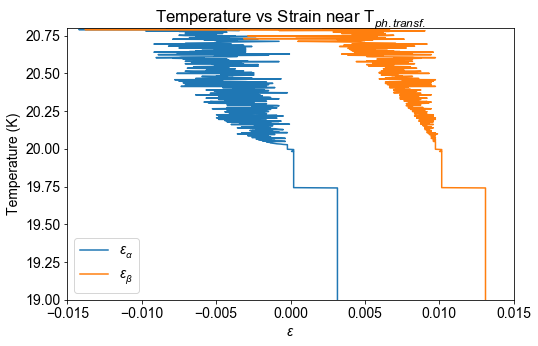

In [64]:
fig, ax = plt.subplots()
p1 = plt.plot(e_1, trange, label=r'$\epsilon_{\alpha}$')
p2 = plt.plot(e_2, trange, label=r'$\epsilon_{\beta}$')

legend = ax.legend(loc="lower left")
title = plt.title(r'Temperature vs Strain near T$_{ph. transf.}$')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'Temperature (K)')
ax.set_xlim(-0.015, 0.015)
ax.set_ylim(19, 20.8)
plt.show()

Strain array from -0.7 to 0.7, with 1000 points. Temperature T = 19 to 21 K, with 1000 points.

In [73]:
e_line = np.linspace(-.07, .07, num=100)
trange = np.linspace(19, 21, num=100)
e_1 = np.array([])
e_2 = np.array([])
for temp in trange:
    clear_output(wait=True)
    fa = ua0 - (a*(temp**4))/12 + 0.5*E*(np.square(e_line))
    fb = ub0 - (b*(temp**4))/12 + 0.5*E*(np.square(e_line-de))
    u1, u2 = find_common_tangent(e_line, fa, e_line, fb)
    e_1 = np.append(e_1, u1)
    e_2 = np.append(e_2, u2)
    print temp

Coordinates of points of tangency are: (-0.0078, -18238.2235) and (0.0021, -21080.3440)
A0 =  -20471.3181938 , A1 =  -287112.180478
21.0


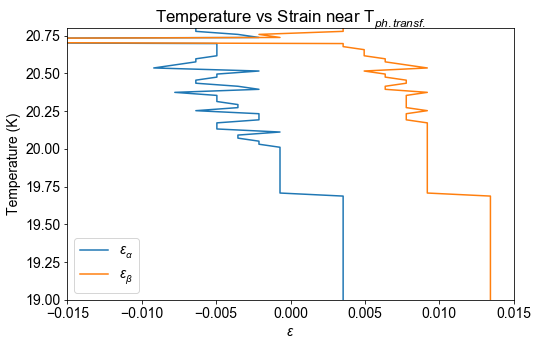

In [74]:
fig, ax = plt.subplots()
p1 = plt.plot(e_1, trange, label=r'$\epsilon_{\alpha}$')
p2 = plt.plot(e_2, trange, label=r'$\epsilon_{\beta}$')

legend = ax.legend(loc="lower left")
title = plt.title(r'Temperature vs Strain near T$_{ph. transf.}$')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'Temperature (K)')
ax.set_xlim(-0.015, 0.015)
ax.set_ylim(19, 20.8)
plt.show()

Strain array from -0.07 to 0.07 with 100 points. Temperature array from 19 to 21 K with 100 points.